<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
#load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
#discover how many class in the dataset
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


281 Plus Service  
266 Basic Service  
236 Total Service  
217 E-Service

array([[<Axes: title={'center': 'income'}>]], dtype=object)

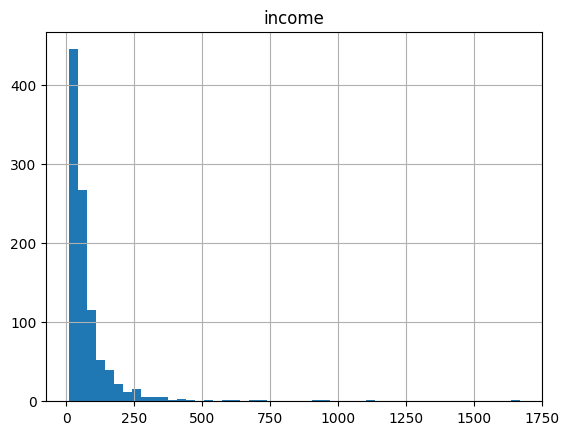

In [5]:
#explore the data visualization
df.hist('income', bins = 50)

In [8]:
#convert the pandas dataframe to a numpy array
#independent var
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
#dependent/target var
y = df['custcat'].values

In [10]:
#preprocess and normalize the data
#data standardization gives the data zero mean and unit variance
#it is good for KNN which is based on the distance of data points
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [12]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# CLASSIFICATION

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [15]:
#Create the model using algorithm K=4
neigh = KNC(n_neighbors = 4).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [16]:
#predicting with the model
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [17]:
#Accuracy evaluation
from sklearn import metrics
print('Train set accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy:', metrics.accuracy_score(y_test, yhat))

Train set accuracy: 0.5475
Test set accuracy: 0.32


In [27]:
#CALCULATE THE ACCURACY OF KNN FOR DIFFERENT VALUES OF K
k = 10
meanAcc = np.zeros((k-1))
stdAcc = np.zeros((k-1))

for n in range(1,k):
  #train the model
  neigh = KNC(n_neighbors = n).fit(X_train, y_train)

  #predict the model
  yhat = neigh.predict(X_test)

  #add the accuracy score to the list
  meanAcc[n-1] = metrics.accuracy_score(y_test, yhat)

  stdAcc = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

meanAcc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

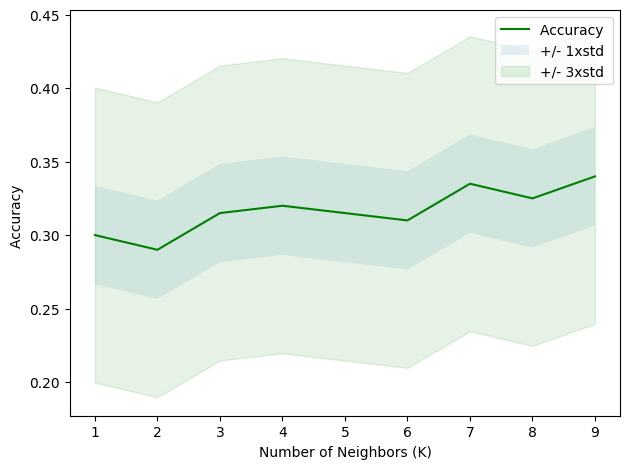

In [29]:
#plot the model accuracy for a different number of neighbors
plt.plot(range(1,k), meanAcc, 'g')
plt.fill_between(range(1,k), meanAcc - 1 * stdAcc, meanAcc + 1 * stdAcc, alpha = 0.10)
plt.fill_between(range(1,k), meanAcc - 3 * stdAcc, meanAcc + 3 * stdAcc, alpha = 0.10, color = 'green')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()